# <center> NLP Mini Project 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Data Loading

In [2]:
df_real = pd.read_csv('../data/BuzzFeed_real_news_content.csv')
df_fake = pd.read_csv('../data/BuzzFeed_fake_news_content.csv')

In [3]:
df_real.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b..."
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict..."


In [4]:
df_fake.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."
3,Fake_12-Webpage,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,http://addictinginfo.addictinginfoent.netdna-c...,John Prager,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://2.gravat...",http://addictinginfo.com/2016/09/19/trumps-lat...,"{""publisher"": ""Addicting Info | The Knowledge ..."
4,Fake_13-Webpage,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,NaN,http://www.proudcons.com,NaN,NaN,NaN,NaN,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty..."


## Data Preprocessing

In [5]:
print(df_real.shape)
print(df_fake.shape)

(91, 12)
(91, 12)


In [6]:
df = pd.concat(
    [df_real,df_fake], 
    axis=0
)

df.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co/2de2qs0,http://static.politico.com/e9/11/6144cdc24e319...,"Jack Shafer,Erick Trickey,Zachary Karabell",http://politi.co,{'$date': 1474974420000},NaN,https://static.politico.com/dims4/default/8a1c...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""He sees it as zero-sum. She b..."
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws/2dh2NFs,http://a.abcnews.com/images/US/AP_Obama_BM_201...,"John Parkinson,More John,Abc News,More Alexander",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/president-obama...,"{""fb_title"": ""President Obama Vetoes 9/11 Vict..."


In [7]:
n_real = len(df_real)
df['news_type'] = ['real'] * n_real + ['fake'] * (len(df) - n_real)

In [8]:
df.iloc[89:93]

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
89,Real_90-Webpage,Chelsea Handler Gets The Last Word After RNC C...,There may be a few women out there who enjoy a...,http://www.addictinginfo.org/2016/09/19/chelse...,http://addictinginfo.addictinginfoent.netdna-c...,NaN,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,https://d5nxst8...",http://addictinginfo.com/2016/09/19/chelsea-ha...,"{""publisher"": ""Addicting Info | The Knowledge ...",real
90,Real_91-Webpage,Is Donald Trump qualified to be president?,Off Message Is Donald Trump qualified to be pr...,http://politi.co/2dkiM5e,http://v.politico.com/images/1155968404/201609...,"Jack Shafer,Kyle Cheney,Daniel Strauss,Daniel ...",http://politi.co,{'$date': 1474866599000},NaN,http://v.politico.com/images/1155968404/201609...,http://www.politico.com/story/2016/09/is-donal...,"{""description"": ""In the most pivotal moment of...",real
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ...",fake
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis...",fake


In [9]:
df.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
count,182,182,182,174,172,141,174,133,25,172,170,182,182
unique,182,178,178,171,166,90,28,118,25,169,168,171,2
top,Real_1-Webpage,CNN’s Post-Debate Rigged Poll Busted…Here Are ...,We’re shocked — SHOCKED — to learn that CNN’s ...,http://eaglerising.com/36847/clinton-foundatio...,http://static.politico.com/da/f5/44342c424c68b...,Terresa Monroe-hamilton,http://politi.co,{'$date': 1474588800000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://static.politico.com/da/f5/44342c424c68b...,http://eaglerising.com/36847/clinton-foundatio...,{},real
freq,1,2,2,2,3,8,32,5,1,2,2,8,91


In [10]:
df.drop(['id','url', 'top_img','authors','publish_date','canonical_link','meta_data'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

title          0
text           0
source         8
movies       157
images        10
news_type      0
dtype: int64

In [12]:
(df.isnull().sum())/(df.shape[0])*100

title         0.000000
text          0.000000
source        4.395604
movies       86.263736
images        5.494505
news_type     0.000000
dtype: float64

In [13]:
df['contain_movies']=df['movies'].apply(lambda x: 0 if str(x)=='nan' else 1)
df['contain_images']=df['images'].apply(lambda x: 0 if str(x)=='nan' else 1)

In [14]:
df.drop(['movies','images'],axis=1,inplace=True)

In [15]:
df.head()

,title,text,source,news_type,contain_movies,contain_images
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,real,0,1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,real,0,1
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com,real,1,1
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co,real,0,1
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws,real,0,1


## EDA

C:\Users\Jaymarq\AppData\Local\Temp\ipykernel_13140\2436570437.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='source', data=df_real, order=df_real['source'].value_counts().index,
C:\Users\Jaymarq\AppData\Local\Temp\ipykernel_13140\2436570437.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='source', data=df_fake, order=df_fake['source'].value_counts().index,


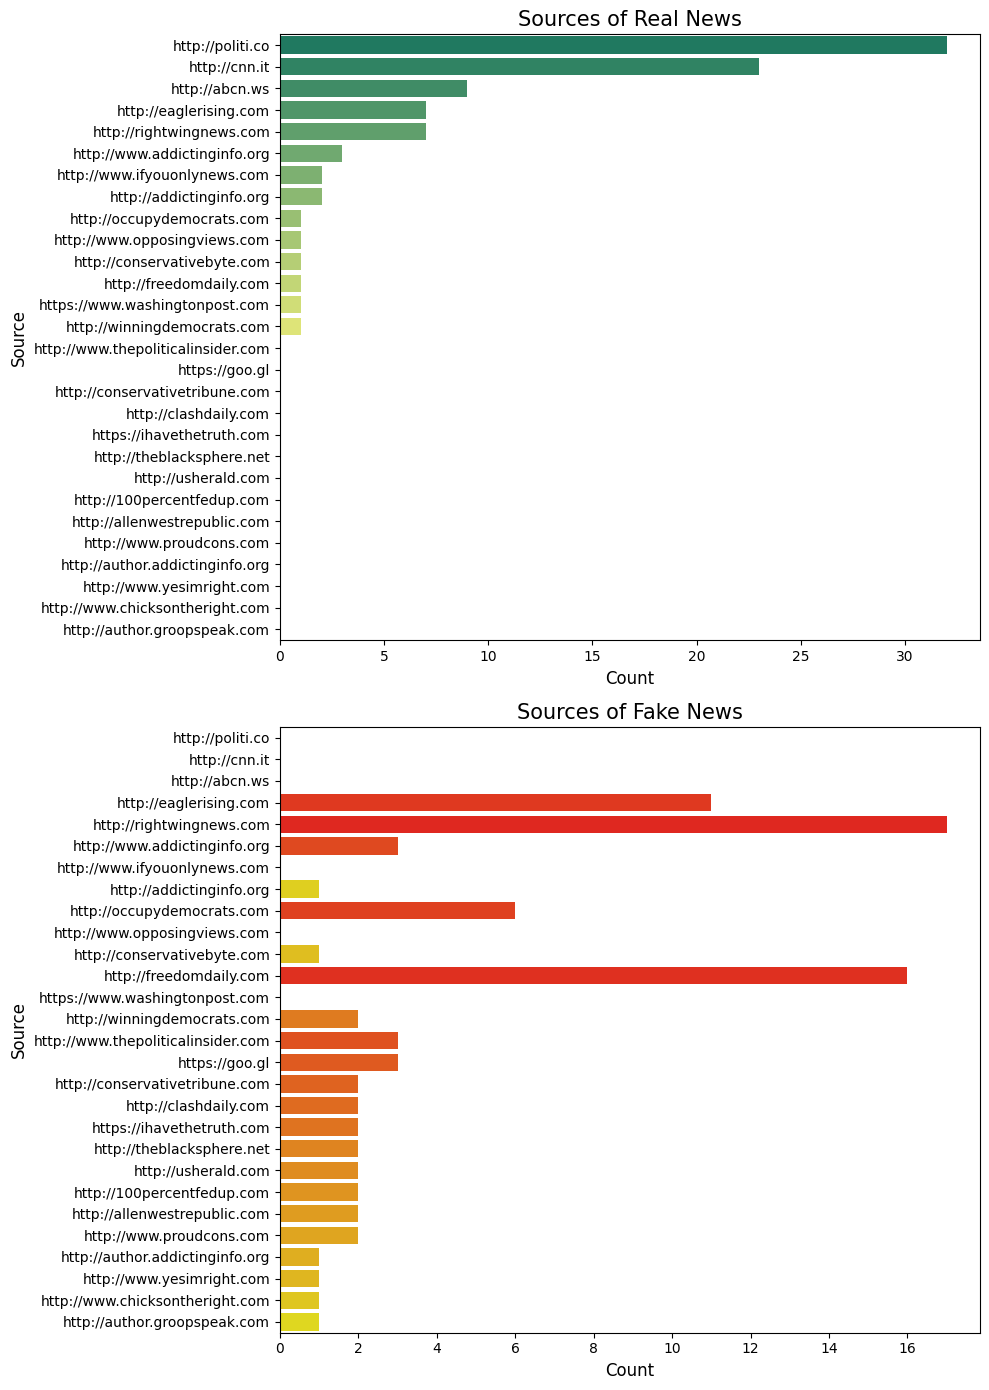

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14), sharey=True)

# Countplot for df_real
sns.countplot(y='source', data=df_real, order=df_real['source'].value_counts().index, 
              palette='summer', ax=ax1)
ax1.set_title('Sources of Real News', fontsize=15)
ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Source', fontsize=12)

# Countplot for df_fake
sns.countplot(y='source', data=df_fake, order=df_fake['source'].value_counts().index, 
              palette='autumn', ax=ax2)
ax2.set_title('Sources of Fake News', fontsize=15)
ax2.set_xlabel('Count', fontsize=12)
ax2.set_ylabel('Source', fontsize=12)


plt.tight_layout()
plt.show()

In [19]:
df_filtered = df.dropna(subset=['source'])
df_grouped = df_filtered.groupby(['source', 'news_type']).size().unstack(fill_value=0)
df_common = df_grouped[(df_grouped['real'] > 0) & (df_grouped['fake'] > 0)]
df_common = df_common.sort_values(by=df_common.columns.tolist(), ascending=False)

<Figure size 1200x600 with 0 Axes>

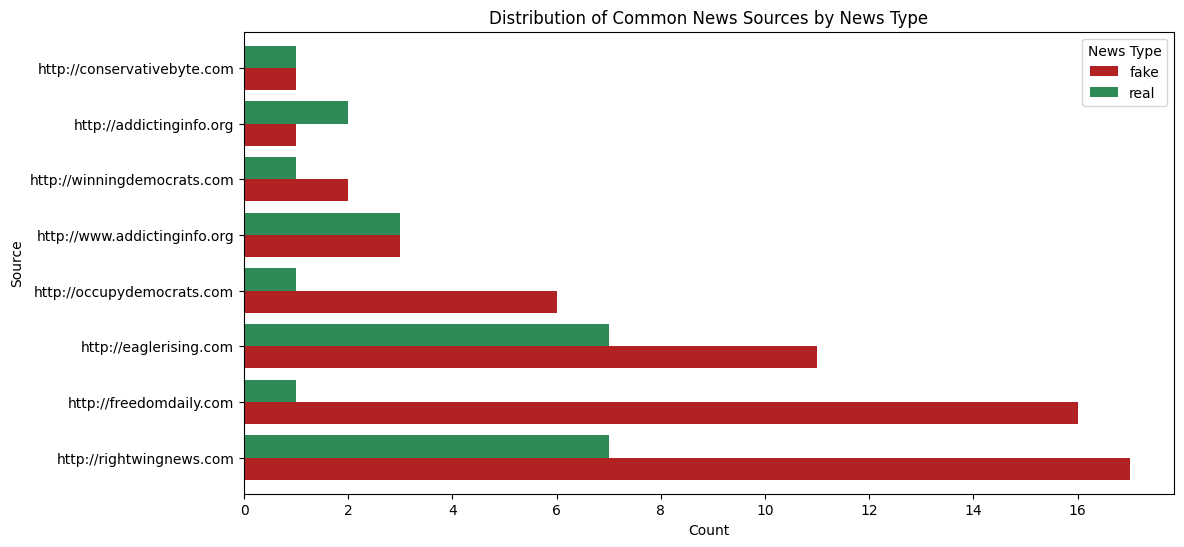

In [34]:
plt.figure(figsize=(12, 6))
df_common.plot(kind='barh', stacked=False, width=0.8, figsize=(12, 6), color=['firebrick', 'seagreen'])
plt.xlabel('Count')
plt.ylabel('Source')
plt.title('Distribution of Common News Sources by News Type')
plt.legend(title='News Type')
plt.show()

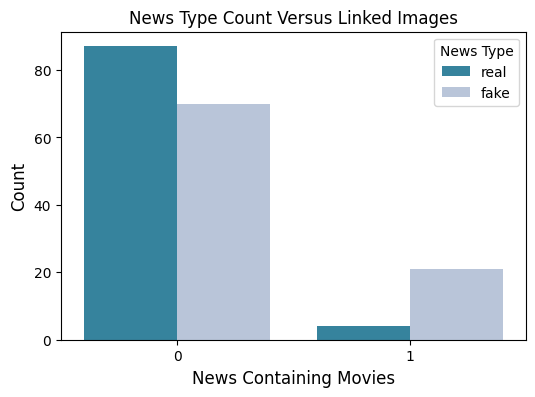

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='contain_movies', data=df, hue='news_type', palette='PuBuGn_r')
plt.xlabel('News Containing Movies',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(loc='best', title='News Type',fontsize=10)
plt.title('News Type Count Versus Linked Images',fontsize=12)
plt.show()

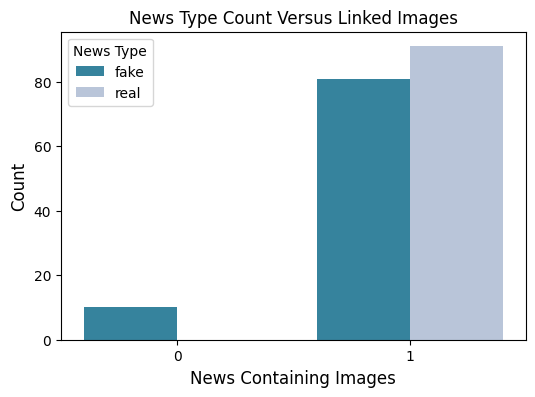

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x='contain_images', data=df, hue='news_type', palette='PuBuGn_r')
plt.xlabel('News Containing Images',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(loc='upper left', title='News Type',fontsize=10)
plt.title('News Type Count Versus Linked Images',fontsize=12)
plt.show()

In [21]:
G = nx.from_pandas_edgelist(
    df[["source", "title"]], 
    source='source', 
    target='title'
)

In [22]:
K = nx.bipartite_layout(
    G, 
    G.nodes, 
    align='vertical', 
    scale=1, 
    center=None, 
    aspect_ratio=1.3333333333333333
)

In [23]:
m, n = df["source"].unique().shape[0], df["title"].unique().shape[0]
m, n

(29, 178)

In [24]:
K

{'http://eaglerising.com': array([ 1.99840144e-15, -1.00000000e+00]),
 'Another Terrorist Attack in NYC…Why Are we STILL Being Politically Correct – Eagle Rising': array([ 1.99840144e-15, -9.90291262e-01]),
 'http://abcn.ws': array([ 1.99840144e-15, -9.80582524e-01]),
 "Donald Trump: Drugs a 'Very, Very Big Factor' in Charlotte Protests": array([ 1.99840144e-15, -9.70873786e-01]),
 'http://rightwingnews.com': array([ 1.99840144e-15, -9.61165049e-01]),
 'Obama To UN: ‘Giving Up Liberty, Enhances Security In America…’ [VIDEO]': array([ 1.99840144e-15, -9.51456311e-01]),
 'http://politi.co': array([ 1.99840144e-15, -9.41747573e-01]),
 'Trump vs. Clinton: A Fundamental Clash over How the Economy Works': array([ 1.99840144e-15, -9.32038835e-01]),
 'President Obama Vetoes 9/11 Victims Bill, Setting Up Showdown With Congress': array([ 1.99840144e-15, -9.22330097e-01]),
 'CHAOS! NC Protest MOB Ambushes Female Truck Driver, Loots Truck, Sets Cargo On Fire – No One Helps!? [VIDEO]': array([ 1.99

In [25]:
labels = dict()

for s in df.source:
    try:
        labels[s] = df.loc[(df == s).any(axis=1)].index[0]
    except:
        labels[s] = "nan"
    
for t in df.title:
    labels[t] = df.loc[(df == t).any(axis=1)].index[0]

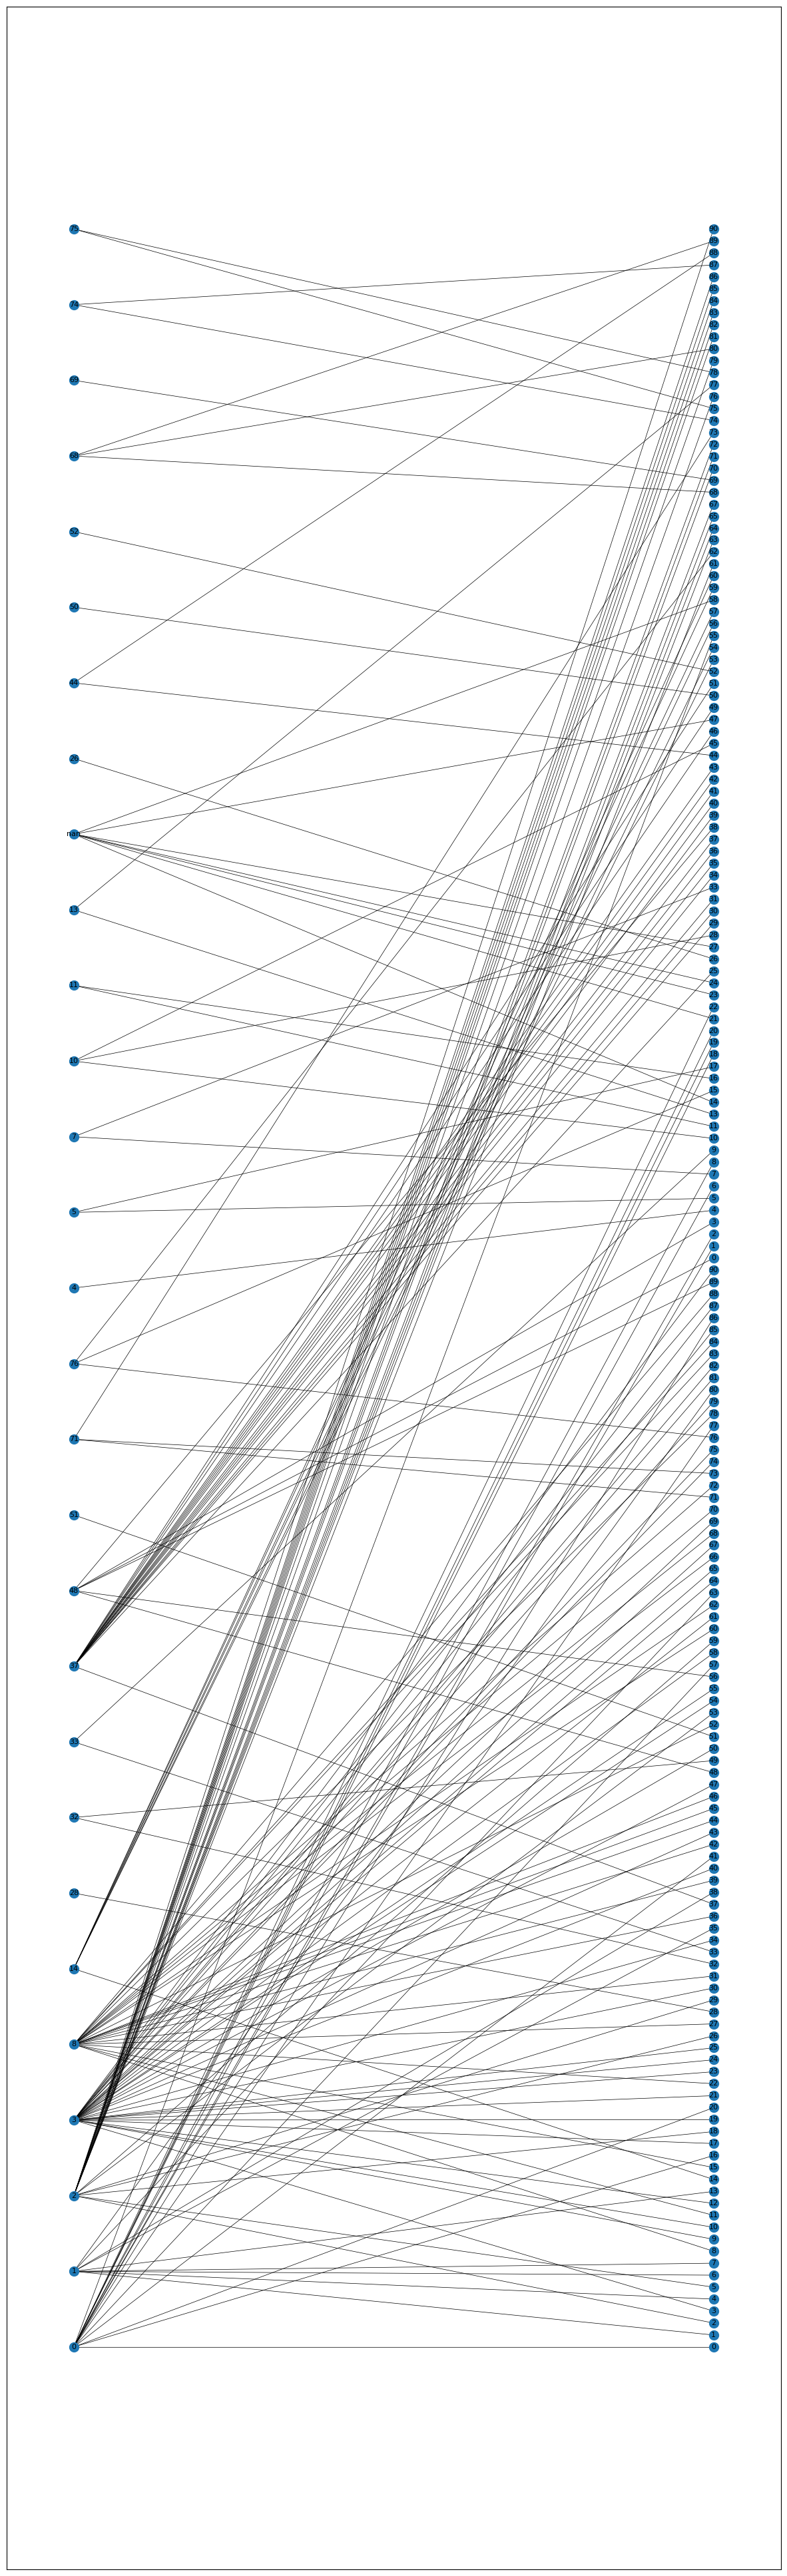

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 50)) 

pos = nx.bipartite_layout(
    G,
    df["source"].unique(),
    align='vertical',
    scale=3, 
    center=None
)

# Draw the network
nx.draw_networkx(
    G,
    pos=pos,
    width=0.5,
    labels=labels,
    node_size=100,
    font_size=8  
)

plt.show()